<a href="https://colab.research.google.com/github/BenSmithGreyGroup/navani/blob/main/Simple_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is for colab! Don't run on your local machine as it will install the navani directory again!

In [1]:
!apt install mdbtools
!pip install galvani
!git clone https://github.com/BenSmithGreyGroup/navani.git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmdb2 libmdbsql2
Suggested packages:
  mdbtools-doc bash-completion
The following NEW packages will be installed:
  libmdb2 libmdbsql2 mdbtools
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 109 kB of archives.
After this operation, 387 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmdb2 amd64 0.7.1-6 [46.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmdbsql2 amd64 0.7.1-6 [22.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mdbtools amd64 0.7.1-6 [39.5 kB]
Fetched 109 kB in 1s (133 kB/s)
Selecting previously unselected package libmdb2:amd64.
(Reading database ... 146456 files and directories currently installed.)
Preparing to unpack .../libmdb2_0.7.1-6_amd64.deb ...
Unpacking libmdb2:amd64 (0.7.1-6) ...
Sele

In [2]:
import navani.echem as ec
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
directory = '/content/'
file = 'bs542_004_gr_li_50ua_50mv_1v_191020_Channel_11.xlsx'
df = ec.echem_file_loader(os.path.join(directory, file))

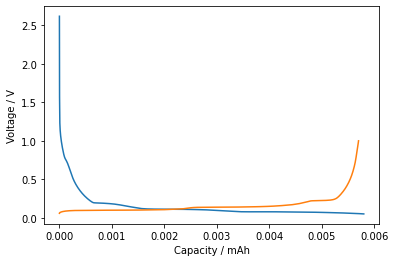

In [5]:
fig, ax = ec.charge_discharge_plot(df, 1)

Text(0, 0.5, 'dQ/dV / mAhV$^{-1}$')

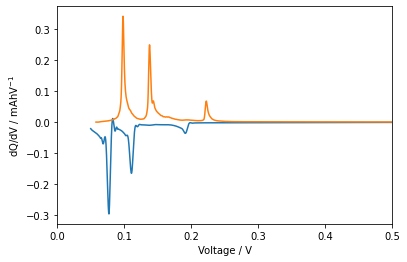

In [6]:
for cycle in [1, 2]:
    mask = df['half cycle'] == cycle
    voltage, dqdv, capacity = ec.dqdv_single_cycle(df['Capacity'][mask], df['Voltage'][mask],
                                                   window_size_1=51,
                                                    polyorder_1=5,
                                                    s_spline=0.0,
                                                    window_size_2=51,
                                                    polyorder_2=5,
                                                    final_smooth=True)
    plt.plot(voltage, dqdv)

plt.xlim(0, 0.5)
plt.xlabel('Voltage / V')
plt.ylabel('dQ/dV / mAhV$^{-1}$')